# **Tutorial 09: Dunders (Special Methods)** 👀

<a id='t9toc'></a>
#### Contents: ####
- [Introduction](#t9intro)
- **[Representation of a Class](#t9reprclass)**
    - [`__str__`](#t9str)
    - [`__repr__`](#t9repr)
- **[Operator Overloading using Dunders](#t9over)**
    - [Example 1: Point](#t9point)
        - *[Exercise 1](#t9ex1)*
    - [Example 2: Rectangle](#t9rect)
        - *[Exercise 2](#t9ex2)*
- [Exercises Solutions](#t9sol)

💡 <b>TIP</b><br>
> <i>In Exercises, when time permits, try to write the codes yourself, and do not copy it from the other cells.</i>

<br><br><a id='t9intro'></a>
## ▙▂ **🄸NTRODUCTION ▂▂**

In Python, special methods are a set of predefined methods you can use to enrich your classes. They are easy to recognize, because they start and end with *double underscores*, for example `__init__` or `__str__`.  

As it quickly became tiresome to say under-under-method-under-under, Pythonistas adopted the term **"dunder methods"**, a short form of "double under".The fact that these methods start and end in double underscores is simply a naming convention to flag them as core Python features. It also helps avoid naming collisions with your own methods and attributes.    

These "dunders" or "special methods" in Python are also sometimes called **"magic methods"**. But using this terminology can make them seem more complicated than they really are. You will see that there is nothing "magical" about them. You should treat these methods like a normal language feature.  

Dunder methods let you emulate the behavior of built-in types. For example, to get the length of a string you can call `len('string')`. But an empty class definition does not support this behavior out of the box:  

In [ ]:
class NoLenSupport:
    pass

In [ ]:
obj = NoLenSupport()
len(obj)

To fix this, you can add a `__len__` dunder method to your class:

In [ ]:
class LenSupport:
    def __len__(self):
        return 42

In [ ]:
obj = LenSupport()
len(obj)

##### **Special Methods and the Python Data Model**
This elegant design is known as the [Python data model](https://docs.python.org/3/reference/datamodel.html) and lets developers tap into rich language features like *sequences*, *iteration*, *operator overloading*, *attribute access*, etc.  
You can see Python's data model as a powerful API you can interface with by implementing one or more dunder methods. If you want to write more Pythonic code, knowing how and when to use dunder methods is an important step.  
In this tutorial, we will practise some of them.

<br>[back to top ↥](#t9toc)

<br><br><a id='t9reprclass'></a>
## ▙▂ **🅁EPRESENTATION OF A CLASS ▂▂**

When you define a custom class in Python and then try to print one of its instances to the console (or inspect it in an interpreter session), you get a relatively unsatisfying result.  

By default, all you get is a string containing the *class name* and the *id* of the object instance (which is the object’s memory address in CPython). That's better than nothing, but it's also not very useful:

In [ ]:
class Point:
    
    def __init__(self, x, y):
        self.x = x
        self.y = y

In [ ]:
A = Point(2, 5)

In [ ]:
A

In [ ]:
print(A)

The default “to string” conversion behavior is basic and lacking.  

You might find yourself trying to work around this by printing attributes of the class directly:

In [ ]:
print(A.x, A.y)

You can format it more nicely:

In [ ]:
print(f'({A.x},{A.y})')

Even more intersting:

In [ ]:
print(f'{A.__class__.__name__}({A.x},{A.y})')

However, accessing and printing the attributes outside the class definition is not good idea, as it violates the concept of Encapsulation in OOP.  
So, can we encapsulate it within the class definition?  

You can do it by adding a custom `to_string()` method to your classes:

In [ ]:
class Point:
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def to_string(self):
        return f'({self.x},{self.y})'

In [ ]:
A = Point(2, 5)

In [ ]:
print(A.to_string())

<br>[back to top ↥](#t9toc)

<a id='t9str'></a>
#### **▇▂  `__str__` ▂▂**

Instead of building your own class-to-string conversion method, you will be better off adding the `__str__` and `__repr__` **dunder methods** to your class. They are the Pythonic way to control how objects are converted to strings in different situations.   

You can learn more about this, in the [Python data model documentation](https://docs.python.org/3/reference/datamodel.html).  


Let’s take a look at how these methods work in practice. To get started, we are going to add a `__str__` method to the class we defined earlier:

In [ ]:
class Point:
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __str__(self):
        return f'({self.x},{self.y})'

In [ ]:
A = Point(2, 5)

When you try printing an instance of the class now, you’ll get a different, slightly improved result:

In [ ]:
print(A)

It prints the object resulted in the string returned by the `__str__` method we added.  

`__str__` is one of Python's "dunder" methods and gets called when you try to convert an object into a string through the various means that are available.  

With a proper __str__ implementation, you won't have to worry about printing object attributes directly or writing a separate `to_string()` function. It’s the Pythonic way to control string conversion.  

However, Inspecting the object in the console still gives us the previous result containing the object's id.  

In [ ]:
A

This happened because there are actually two dunder methods that control how objects are converted to strings in Python 3. The first one is `__str__`, and you just learned about it. The second one is `__repr__`, and the way it works is similar to `__str__`, but it is used in different situations.

<br>[back to top ↥](#t9toc)

<a id='t9repr'></a>
#### **▇▂  `__repr__` ▂▂**
Here is a simple experiment you can use to get a feel for when `__str__` or `__repr__` is used. Let's redefine our car class, so it contains both to-string dunder methods with outputs that are easy to distinguish:

In [ ]:
class sample:

    def __str__(self):
        return 'str'

    def __repr__(self):
        return 'repr'

Now, when you play through the previous examples, you can see which method controls the string conversion result in each case:

In [ ]:
obj = sample()

In [ ]:
print(obj)

In [ ]:
obj

This experiment confirms that inspecting an object in a Python interpreter session simply prints the result of the object's `__repr__`.

Interestingly, containers like lists and dicts always use the result of` __repr__` to represent the objects they contain. Even if you call `str` on the container itself:

In [ ]:
str([obj])

To manually choose between both string conversion methods, for example, to express your code's intent more clearly, it's best to use the built-in `str()` and `repr()` functions. Using them is preferable over calling the object's `__str__` or `__repr__` directly, as it looks nicer and gives the same result:

In [ ]:
str(obj)

In [ ]:
repr(obj)

Even with this investigation, you might be wondering what the "real-world" difference is between `__str__` and `__repr__`. They both seem to serve the same purpose, so it might be unclear when to use each.

- The result of the date object's `__str__` function should primarily be **readable**.  
It is meant to return a concise textual representation for *human consumption*, something you would feel comfortable displaying to a user.  

- With `__repr__`, the idea is that its result should be, above all, **unambiguous**.    
The resulting string is intended more as a *debugging aid for developers*. Hence, it needs to be as explicit as possible about what this object is. That's why you'll get a more elaborate result calling `repr()` on the object. It could even include the full module and class name.

##### **Summary:**
1. `__str__`: The "informal" or nicely printable string representation of an object. This is for the end user.
2. `__repr__`: The "official" string representation of an object. This is how you would make an object of the class. The goal of `__repr__` is to be unambiguous.

##### Why Every Python Class Needs a `__repr__`?  
If you don't add a `__str__` method, Python falls back on the result of `__repr__` when looking for `__str__`. Therefore, it is recommended that always add at least a `__repr__` method to your classes. This will guarantee a useful string conversion result in almost all cases, with a minimum of implementation work.  

Here's how to add basic string conversion support to your classes quickly and efficiently. For our class we might start with the following `__repr__`:

In [ ]:
class Point:
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __repr__(self):
        return f'Point({self.x},{self.y})'

In [ ]:
A = Point(2, 5)

In [ ]:
print(A)

This works nicely, but one downside is that we've repeated the class name inside the format string. A trick you can use here to avoid this repetition is to use the object's `__class__.__name__` attribute, which will always reflect the class name as a string.  
The benefit is you won't have to modify the `__repr__` implementation when the class name changes. This makes it easy to adhere to the Don't Repeat Yourself (DRY) principle.

In [ ]:
class Point:
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __repr__(self):
        return f'{self.__class__.__name__}({self.x},{self.y})'


With the above `__repr__` implementation, we get a useful result when we inspect the object or call `repr()` on it directly:



In [ ]:
A = Point(2, 5)

In [ ]:
A

In [ ]:
repr(A)

Printing the object or calling `str()` on it returns the same string, because the default `__str__` implementation simply calls `__repr__`:



In [ ]:
str(A)

In [ ]:
print(A)

Here is a complete example, including an optional `__str__` implementation:

In [ ]:
class Point:

    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __str__(self):
        return '({},{})'.format(self.x, self.y)
    
    def __repr__(self):
        return '{}({},{})'.format(self.__class__.__name__, self.x, self.y)

In [ ]:
A = Point(3, 7)

In [ ]:
print(A)

In [ ]:
A

Let's test the class, if there is not `__str__`:

In [ ]:
class Point:

    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __repr__(self):
        return '{}({},{})'.format(self.__class__.__name__, self.x, self.y)

In [ ]:
A = Point(3, 7)

In [ ]:
A

In [ ]:
print(A)

Now, let's test the class, if there is not `__repr__` method:

In [ ]:
class Point:

    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __str__(self):
        return '({},{})'.format(self.x, self.y)

In [ ]:
A = Point(3, 7)

In [ ]:
A

In [ ]:
print(A)

<br>[back to top ↥](#t9toc)

<br><br><a id='t9over'></a>
## ▙▂ **🄾perator 🄾verloading using Dunders ▂▂**

You can easily write statements to compare Python objects:

In [ ]:
6 == 9-3

In [ ]:
'This' == 'this'

This feels completely natural, but it's actually quite amazing what happens behind the scenes here.   
Why does `==` work equally well on integers, strings and other objects (as long as they are the same type)?  
This **polymorphic** behavior is possible, because these objects implement one or more **comparison dunder methods**.

 We verify this by using the `dir()` builtin:

In [ ]:
dir('This')

In [ ]:
'This'.__eq__('this')

Let's instantiate two objects from `Point` class and compare them:

In [ ]:
class Point:

    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __str__(self):
        return '({},{})'.format(self.x, self.y)

In [ ]:
A = Point(2, 4)
B = Point(1, -3)

In [ ]:
A < B

What happened here?   

We got a TypeError because we have not implemented any comparison dunders nor inherited them from a parent class.

How about this:

In [ ]:
A == B

**Strange behaviour!**  
You probably expected to get an error, because in the `Point` class, we did not overload `==` operator too, but it did not produce any error. why?

How can we verify that `==` or `<` are not implemented in our class?

In [ ]:
A.__eq__(B)

In [ ]:
A.__lt__(B)

<br>[back to top ↥](#t9toc)

<a id='t9point'></a>
#### **▇▂  Example 1: Point ▂▂**

Let's work on overloading some operators for an improved version of `Point` class (we already saw a simpler version of this example in the Lecture 3 and Tutorial 5):

In [ ]:
import math

class Point:
    
    def __init__(self, x=0.0, y=0.0):
        self.x = x
        self.y = y
    
    def __add__(self, p):
        """ Point(x1+x2, y1+y2) """
        return Point(self.x + p.x, self.y + p.y)
    
    def __sub__(self, p):
        """ Point(x1-x2, y1-y2) """
        return Point(self.x - p.x, self.y - p.y)
       
    def __str__(self):
        return '({},{})'.format(self.x, self.y)
    
    def __repr__(self):
        return '{}({},{})'.format(self.__class__.__name__, self.x, self.y)
    
    def length(self):
        return math.sqrt(self.x ** 2 + self.y ** 2)
    
    def distance_to(self, p):
        """ Calculate the distance between two points. """
        return (self - p).length()
    
    def as_tuple(self):
        """ (x, y) """
        return (self.x, self.y)
    

In [ ]:
A = Point(2, 5)
B = Point(7, 1)

In [ ]:
A.length()

In [ ]:
A + B

In [ ]:
A - B

In [ ]:
A.distance_to(B)

In [ ]:
(A - B).length()

<br>[back to top ↥](#t9toc)

<br><br><a id='t9ex1'></a>
◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾

**✎ Exercise 1**<br> <br> ▙ ⏰ ~ 15 min. ▟ <br>

❶ Create a new class to define a line with 2 endpoints, using `Point` class.

In [ ]:
# Exercise 1.1


❷ Overload the following comparison operators in the `Line` class to make the following operators valid.
- `L1 > L2`  if the length of L1 is greater than the length of L2
- `L1 >= L2` : if the length of L1 is greater than or equal to the length of L2
- `L1 < L2` : if the length of L1 is less than length of L2
- `L1 <= L2` : if the length of L1 is less than or equal to the length of L2
- `L1 == L2` : if the length of L1 is equal to the length of L2
- `L1 != L2` : if the length of L1 is not equal to the length of L2

In [ ]:
# Exercise 1.2


<br>[back to top ↥](#t9toc)

<a id='t9rect'></a>
#### **▇▂  Example 2: Rectangle  ▂▂**

Now, let's define a new class `Rectangle` to define a recangle using 2 diagonal (opposite) corner points.

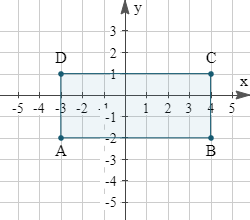

In [ ]:
class Rect:

    def __init__(self, pt1, pt2):
        """ Initialize a rectangle from two points. """
        self.set_points(pt1, pt2)

    def set_points(self, pt1, pt2):
        """ Reset the rectangle coordinates. """
        (x1, y1) = pt1.as_tuple()
        (x2, y2) = pt2.as_tuple()
        self.left = min(x1, x2)
        self.top = max(y1, y2)
        self.right = max(x1, x2)
        self.bottom = min(y1, y2)
    
    def top_left(self):
        """ Return the top-left corner as a Point. """
        return Point(self.left, self.top)
    
    def bottom_right(self):
        """ Return the bottom-right corner as a Point. """
        return Point(self.right, self.bottom)
    
    def __str__( self ):
        return '<Rect (%s,%s)-(%s,%s)>' % (self.left,self.top,
                                           self.right,self.bottom)
    
    def __repr__(self):
        return "%s(%r, %r)" % (self.__class__.__name__,
                               Point(self.left, self.top),
                               Point(self.right, self.bottom))

In [ ]:
A = Point(-3,-2)
C = Point(4,1)
r1 = Rect(A, C)

In [ ]:
B = Point(4,-2)
D = Point(-3,1)
r2 = Rect(B, D)

In [ ]:
r1

In [ ]:
print(r2)

How can we compare the area of two rectangles?

In [ ]:
r1 == r2

`r1` and `r2` are defining the same rectangle, why the result of `r1 == r2` does not confirm it?

<br>[back to top ↥](#t9toc)

<br><br><a id='t9ex2'></a>
◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾

**✎ Exercise 2**<br> <br> ▙ ⏰ ~ 10 min. ▟ <br>

❶ Overload the following comparison operators in the `Rect` class to make the following operators valid.
- `R1 > R2`  if the area of R1 is greater than the area of R2
- `R1 >= R2` : if the area of R1 is greater than or equal to the area of R2
- `R1 < R2` : if the area of R1 is less than area of R2
- `R1 <= R2` : if the area of R1 is less than or equal to the area of R2
- `R1 = R2` : if the area of R1 is equal to the area of R2
- `R1 != R2` : if the area of R1 is not equal to the area of L2

In [ ]:
# Exercise 2.1


◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾◾

<br>[back to top ↥](#t9toc)

<br><br><a id='t9sol'></a>
◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼<br>
◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼

#### 🔑 **Exercises Solutions** ####

**Exercise 1.1:**

In [ ]:
class Line:
    
    def __init__(self, pt1, pt2):
        self.pt1 = pt1
        self.pt2 = pt2
    
    def __str__(self):
        return "<Line (%s,%s):(%s,%s)>" % (self.pt1.x,self.pt1.y,
                                           self.pt2.x,self.pt2.y)
    
    def __repr__(self):
        return "%s(%r, %r)" % (self.__class__.__name__,
                               Point(self.pt1.x,self.pt1.y),
                               Point(self.pt2.x,self.pt2.y))    

**Exercise 1.2:**

In [ ]:
class Line:
    
    def __init__(self, pt1, pt2):
        self.pt1 = pt1
        self.pt2 = pt2
    
    def __str__(self):
        return "<Line (%s,%s):(%s,%s)>" % (self.pt1.x,self.pt1.y,
                                           self.pt2.x,self.pt2.y)
    
    def __repr__(self):
        return "%s(%r, %r)" % (self.__class__.__name__,
                               Point(self.pt1.x,self.pt1.y),
                               Point(self.pt2.x,self.pt2.y))
    
    def length(self):
        return self.pt1.distance_to(self.pt2)
    
    def __lt__(self, other):
        return True if self.length() < other.length() else False

    def __le__(self, other):
        return True if self.length() <= other.length() else False
    
    def __eq__(self, other):
        return True if self.length() == other.length() else False

<br>[back to the Exercise 1 ↥](#t9ex1)

**Exercise 2.1:**

In [ ]:
class Rect:

    def __init__(self, pt1, pt2):
        """Initialize a rectangle from two points."""
        self.set_points(pt1, pt2)
        self.rlength = max(abs(self.left-self.right), abs(self.top-self.bottom))
        self.rwidth = min(abs(self.left-self.right), abs(self.top-self.bottom))

    def set_points(self, pt1, pt2):
        """Reset the rectangle coordinates."""
        (x1, y1) = pt1.as_tuple()
        (x2, y2) = pt2.as_tuple()
        self.left = min(x1, x2)
        self.top = max(y1, y2)
        self.right = max(x1, x2)
        self.bottom = min(y1, y2)

    def top_left(self):
        """Return the top-left corner as a Point."""
        return Point(self.left, self.top)
    
    def bottom_right(self):
        """Return the bottom-right corner as a Point."""
        return Point(self.right, self.bottom)
    
    def length(self):
        return self.rlength
    
    def width(self):
        return self.rwidth
        
    def area(self):
        return self.rwidth * self.rlength
    
    def __str__(self):
        return "<Rect (%s,%s):(%s,%s)>" % (self.left,self.top,
                                           self.right,self.bottom)
    
    def __repr__(self):
        return "%s(%r, %r)" % (self.__class__.__name__,
                               Point(self.left, self.top),
                               Point(self.right, self.bottom))
    
    def __lt__(self, other):
        return True if self.area() < other.area() else False

    def __le__(self, other):
        return True if self.area() <= other.area() else False
    
    def __eq__(self, other):
        return True if self.area() == other.area() else False

In [ ]:
A = Point(2,5)
B = Point(7,1)
r1 = Rect(A, B)

In [ ]:
C = Point(4,6)
D = Point(7,3)
r2 = Rect(C, D)

In [ ]:
r1.area()

In [ ]:
r2.area()

In [ ]:
r1 < r2

<br>[back to the Exercise 2 ↥](#t9ex2)

<br>[back to top ↥](#t9toc)

◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼<br>
◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼